# Bike Sales Analysis in Erope

In [17]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load Dataset
data = pd.read_csv('sales_bike.csv')
df = data.copy()

print("Overview Dataset:")
print(df.head())

print("\nInformasi Data:")
print(df.info())

print("\nDescibe Data:")
print(df.describe())

Overview Dataset:
         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack

# Data Cleaning

In [3]:
print("\nMissing Values:")
missing_value = df.isnull().sum()
print(missing_value[missing_value > 0] if missing_value.sum() > 0 else "No missing values found")


print("\nDuplicate Rows:")
df.duplicated(keep=False).sum()
df = df.drop_duplicates()
print(df)


Missing Values:
No missing values found

Duplicate Rows:
              Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_

# Exploratory Data Analysis

C:\Users\Khalif Umar Al Faruq\AppData\Local\Temp\ipykernel_42044\1828638318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='mako')


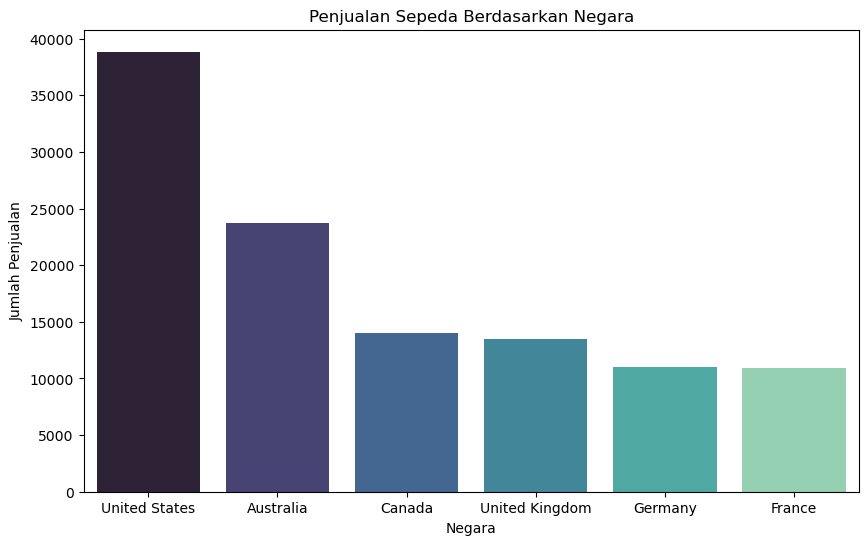

In [4]:
# Penjualan berdasarkan negara
plt.figure(figsize=(10,6))
plt.title('Penjualan Sepeda Berdasarkan Negara')
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='mako')
plt.xlabel('Negara')
plt.ylabel('Jumlah Penjualan')
plt.show()

C:\Users\Khalif Umar Al Faruq\AppData\Local\Temp\ipykernel_42044\1816351579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Sub_Category', order=df['Sub_Category'].value_counts().index, palette='mako')


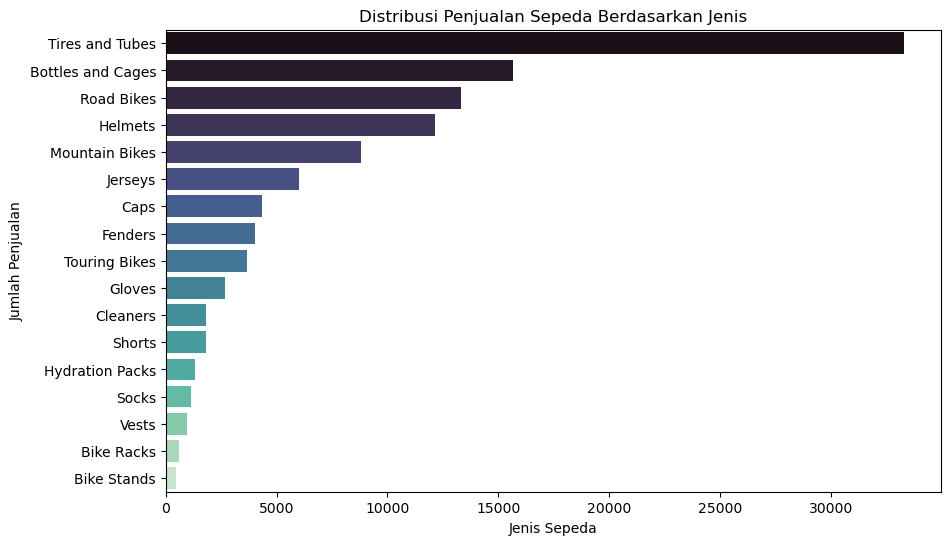

In [5]:
# Penjualan berdasarkan jenis sepeda
plt.figure(figsize=(10,6))
plt.title("Distribusi Penjualan Sepeda Berdasarkan Jenis")
sns.countplot(data=df, y='Sub_Category', order=df['Sub_Category'].value_counts().index, palette='mako')
plt.xlabel('Jenis Sepeda')
plt.ylabel('Jumlah Penjualan')
plt.show()

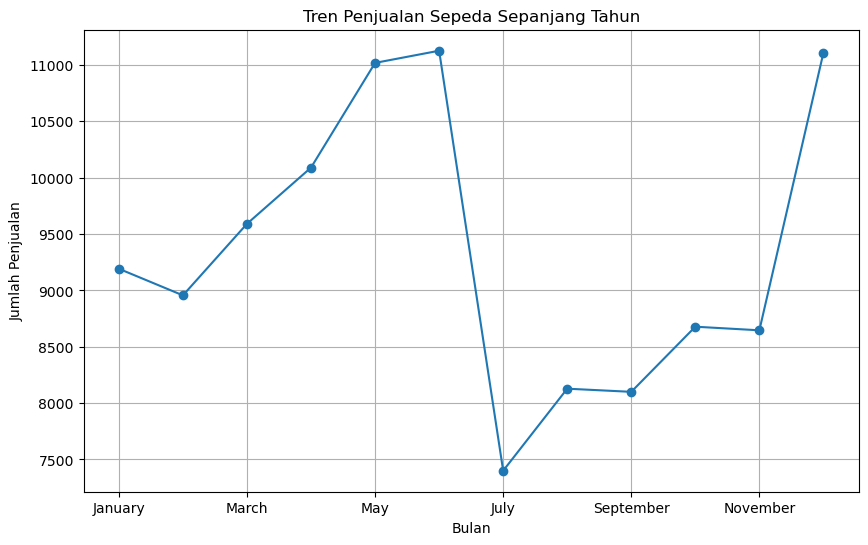

In [6]:
# Tren penjualan bulanan
monthly_sales = df.groupby('Month').size().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])
monthly_sales.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Tren Penjualan Sepeda Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

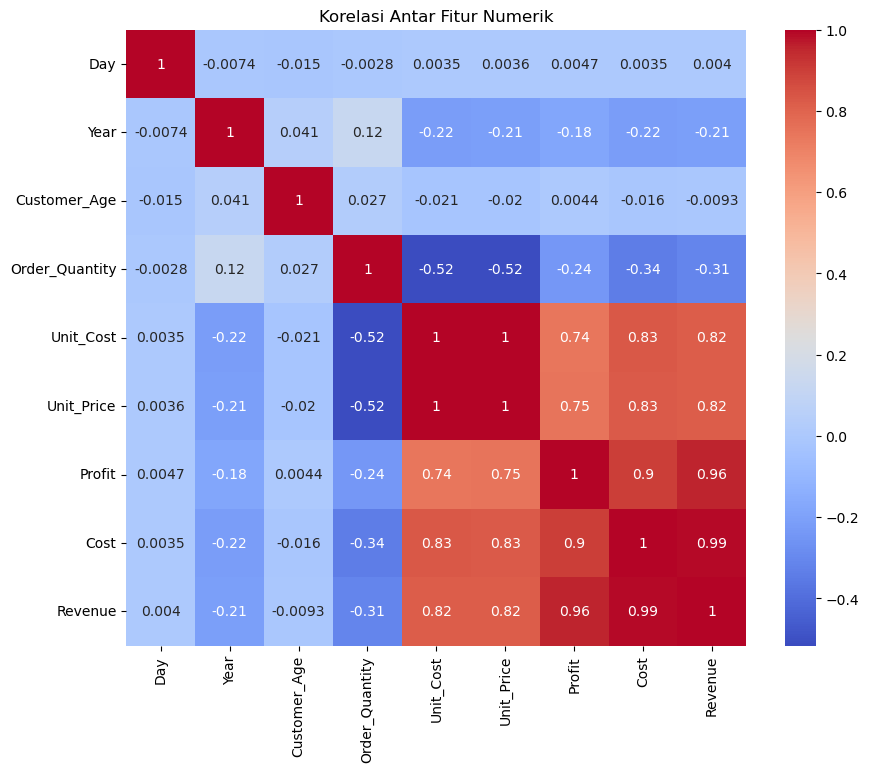

In [7]:
# Korelasi fitur numerik
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

C:\Users\Khalif Umar Al Faruq\AppData\Local\Temp\ipykernel_42044\925855906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product_Category', palette='Set2')


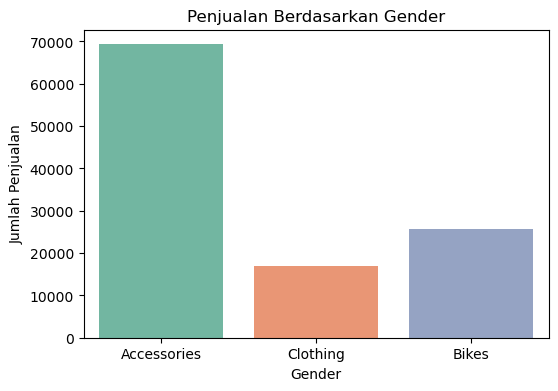

In [8]:
# Penjualan berdasarkan Kategori Produk
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Product_Category', palette='Set2')
plt.title('Penjualan Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Penjualan')
plt.show()

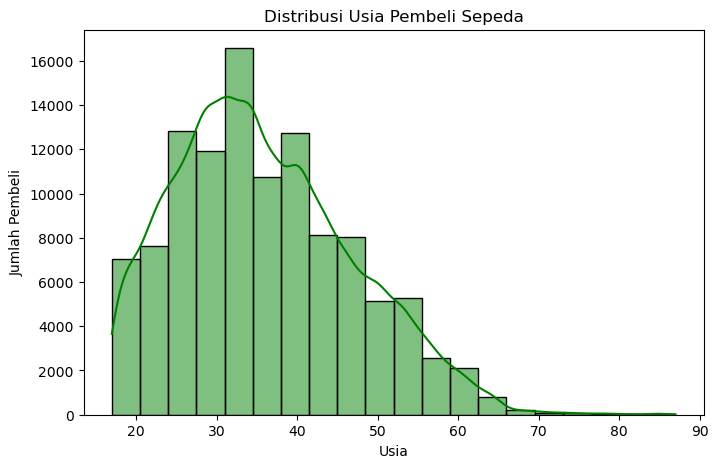

In [9]:
# Distribusi usia pembeli
plt.figure(figsize=(8,5))
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='green')
plt.title('Distribusi Usia Pembeli Sepeda')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pembeli')
plt.show()

# Data Visualisasi

Negara dengan penjualan tertinggi: United States
Didukung oleh visualisasi berikut:



C:\Users\Khalif Umar Al Faruq\AppData\Local\Temp\ipykernel_42044\3352627499.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='mako')


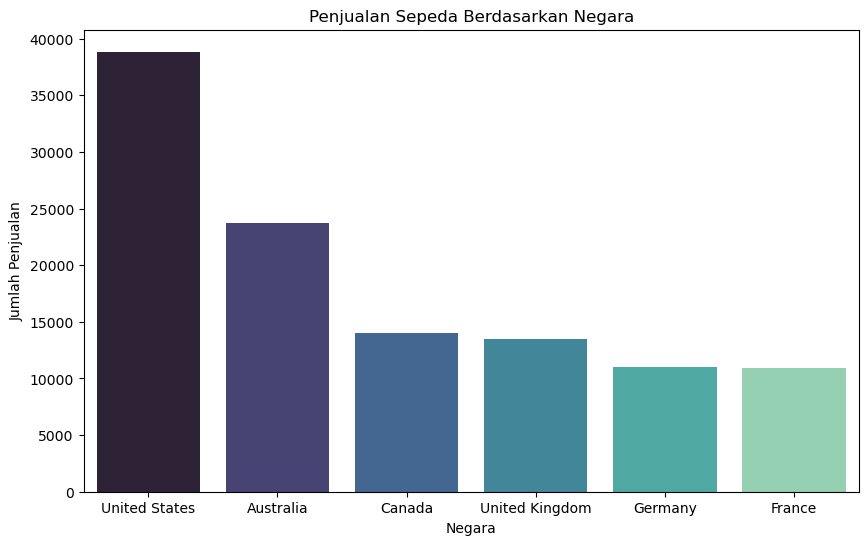

In [10]:
# Negara dengan penjualan tertinggi
top_country = df['Country'].value_counts().idxmax()
print(f"Negara dengan penjualan tertinggi: {top_country}")

# Bukti
print("Didukung oleh visualisasi berikut:\n")
plt.figure(figsize=(10,6))
plt.title('Penjualan Sepeda Berdasarkan Negara')
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index, palette='mako')
plt.xlabel('Negara')
plt.ylabel('Jumlah Penjualan')
plt.show()

Jenis sepeda paling laku: Tires and Tubes
Didukung oleh visualisasi berikut:



C:\Users\Khalif Umar Al Faruq\AppData\Local\Temp\ipykernel_42044\3550341298.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Sub_Category', order=df['Sub_Category'].value_counts().index, palette='mako')


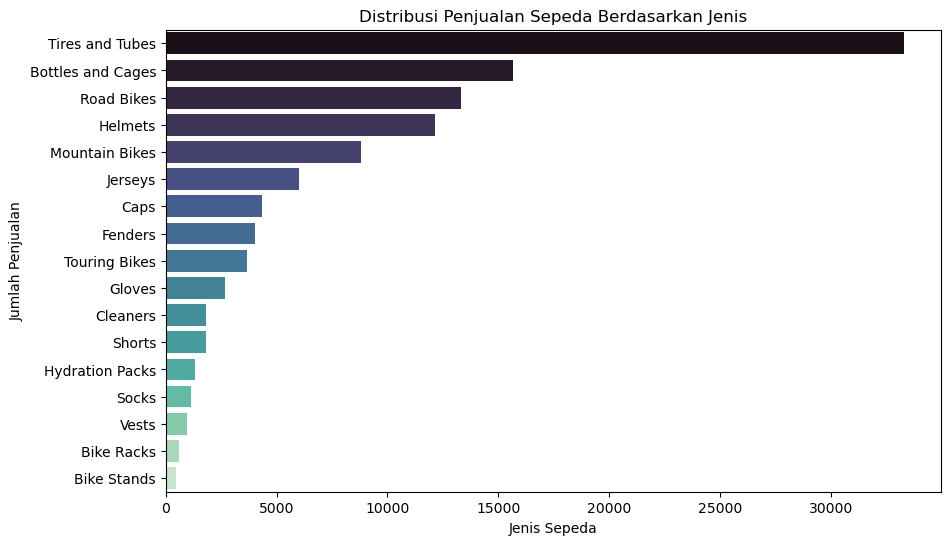

In [11]:
# Jenis sepeda paling laku
top_bike = df['Sub_Category'].value_counts().idxmax()
print(f"Jenis sepeda paling laku: {top_bike}")

# Bukti
print("Didukung oleh visualisasi berikut:\n")
plt.figure(figsize=(10,6))
plt.title("Distribusi Penjualan Sepeda Berdasarkan Jenis")
sns.countplot(data=df, y='Sub_Category', order=df['Sub_Category'].value_counts().index, palette='mako')
plt.xlabel('Jenis Sepeda')
plt.ylabel('Jumlah Penjualan')
plt.show()

Bulan dengan penjualan tertinggi: June
Didukung oleh visualisasi berikut:



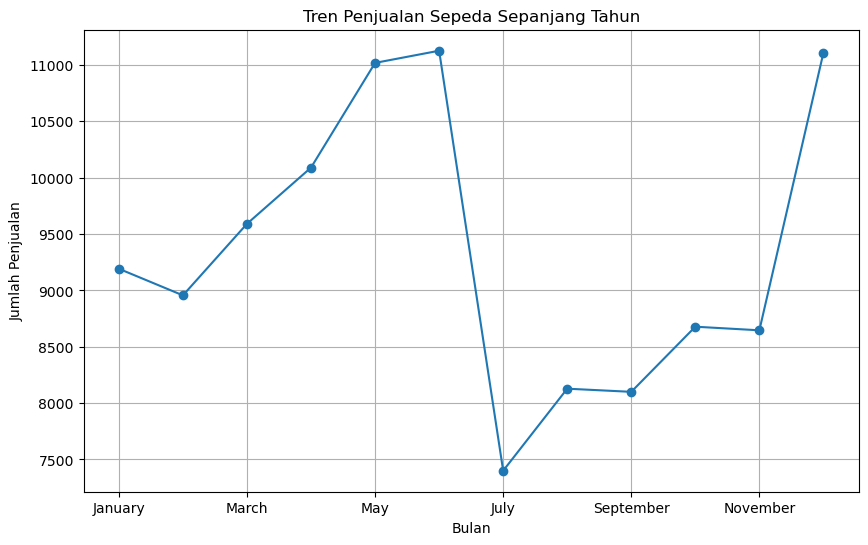

In [12]:
# Bulan dengan penjualan tertinggi
top_month = df['Month'].value_counts().idxmax()
print(f"Bulan dengan penjualan tertinggi: {top_month}")

# Bukti
print("Didukung oleh visualisasi berikut:\n")
monthly_sales = df.groupby('Month').size().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])
monthly_sales.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Tren Penjualan Sepeda Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

Customer_Age
31-45    50327
18-30    36349
46-60    20110
<18       3035
>60       2215
Name: count, dtype: int64
Maka kelompok usia terbanyak adalah:  31-45
Didukung oleh visualisasi berikut:



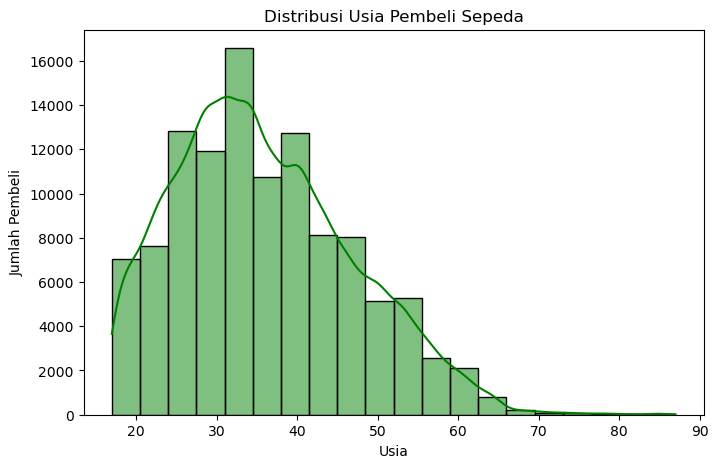

In [13]:
# Kelompok usia terbanyak
age_group = pd.cut(df['Customer_Age'], bins=[0,18,30,45,60,100], labels=['<18','18-30','31-45','46-60','>60'])
print(age_group.value_counts())
print("Maka kelompok usia terbanyak adalah: ", age_group.value_counts().idxmax())

# Bukti
print("Didukung oleh visualisasi berikut:\n")
plt.figure(figsize=(8,5))
sns.histplot(df['Customer_Age'], bins=20, kde=True, color='green')
plt.title('Distribusi Usia Pembeli Sepeda')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pembeli')
plt.show()

# Conclution & Recomendation

- Diperlukan adanya  fokus pemasaran di negara dan bulan dengan penjualan tertinggi.
- Promosikan jenis sepeda favorit ke kelompok usia dan gender yang dominan.
- Buat promo khusus di bulan dengan penjualan terendah.

# AI Support Explanation

In [14]:
# Prediksi Jenis Sepeda yang Akan Dibeli

# 1. Siapkan fitur dan target
X = df[['Customer_Age', 'Customer_Gender', 'Month', 'Country']]
y = df['Sub_Category']

# 2. Encode fitur kategorikal
X_encoded = pd.get_dummies(X, columns=['Customer_Gender', 'Month', 'Country'])

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Buat dan latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. Contoh prediksi untuk strategi pemasaran
sample = pd.DataFrame({
    'Customer_Age': [25],
    'Customer_Gender_Male': [1],
    'Customer_Gender_Female': [0],
    'Month_July': [1],
}, index=[0])

for col in X_encoded.columns:
    if col not in sample.columns:
        sample[col] = 0
sample = sample[X_encoded.columns]

predicted_bike = model.predict(sample)

# Hasil Model
print(f"Jenis sepeda yang direkomendasikan untuk dipromosikan: {predicted_bike[0]}")

Akurasi: 0.31310246340592646
                   precision    recall  f1-score   support

       Bike Racks       0.03      0.01      0.01       125
      Bike Stands       0.00      0.00      0.00       100
Bottles and Cages       0.26      0.30      0.28      3166
             Caps       0.08      0.01      0.02       860
         Cleaners       0.07      0.01      0.02       342
          Fenders       0.10      0.03      0.04       780
           Gloves       0.02      0.00      0.00       543
          Helmets       0.11      0.05      0.07      2484
  Hydration Packs       0.06      0.01      0.01       267
          Jerseys       0.11      0.03      0.04      1213
   Mountain Bikes       0.19      0.13      0.16      1786
       Road Bikes       0.27      0.28      0.28      2636
           Shorts       0.21      0.05      0.08       377
            Socks       0.19      0.01      0.02       228
  Tires and Tubes       0.38      0.73      0.50      6644
    Touring Bikes       0.

Penjelasan:

Dengan model ini, tim pemasaran dapat menargetkan promosi produk yang paling relevan untuk setiap segmen pelanggan, sehingga meningkatkan peluang penjualan dan efisiensi kampanye

                        Day         Year  Customer_Age  Order_Quantity  \
Customer_Segment                                                         
0                 15.602363  2014.392068     36.601687       12.048397   
1                 15.793348  2014.402346     35.125190       11.841423   
2                 15.571597  2014.445815     34.876213       11.313594   

                   Unit_Cost  Unit_Price      Profit        Cost     Revenue  
Customer_Segment                                                              
0                 260.730026  443.092416  281.183448  462.793150  743.976598  
1                 269.425059  455.101885  288.750624  473.790056  762.540680  
2                 302.105831  510.056679  303.798948  508.454974  812.253922  
Customer_Segment
0    62132
1    38877
2    11027
Name: count, dtype: int64


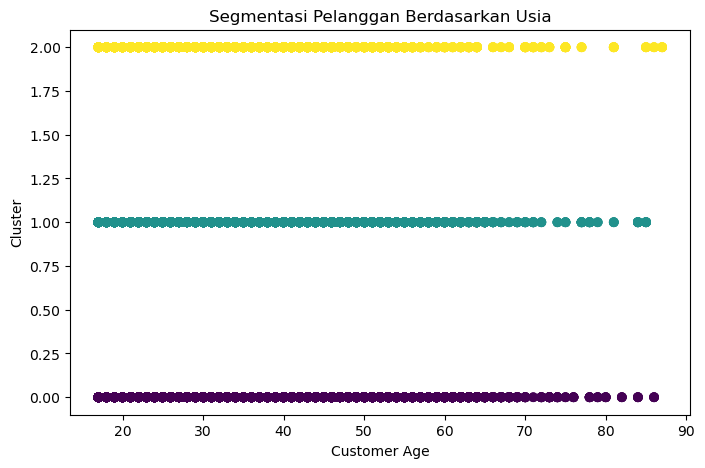

In [15]:
# Segmentasi Pelanggan dengan KMeans Clustering

# 1. Pilih fitur yang relevan untuk segmentasi
features = df[['Customer_Age', 'Customer_Gender', 'Country']]

# 2. Encode fitur kategorikal
features_encoded = pd.get_dummies(features, columns=['Customer_Gender', 'Country'])

# 3. Standarisasi fitur numerik
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# 4. Tentukan jumlah cluster (misal: 3 segmen pelanggan)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# 5. Tambahkan hasil cluster ke dataframe
df['Customer_Segment'] = clusters

# 6. Analisis hasil segmentasi
print(df.groupby('Customer_Segment').mean(numeric_only=True))
print(df['Customer_Segment'].value_counts())

# Visualisasi (opsional, jika ingin melihat distribusi usia vs segmentasi)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['Customer_Age'], clusters, c=clusters, cmap='viridis')
plt.xlabel('Customer Age')
plt.ylabel('Cluster')
plt.title('Segmentasi Pelanggan Berdasarkan Usia')
plt.show()

Penjelasan:

Hasil model dapat digunakan untuk memahami karakteristik tiap segmen dan menyesuaikan stategi pemasaran guna membuat promosi lebih personal dan efektif.

In [21]:
# Prediksi Jumlah Sepeda yang Dibeli (Order_Quantity) Pelanggan

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Siapkan fitur dan target
X = df[['Customer_Age', 'Customer_Gender', 'Month', 'Country']]
y = df['Order_Quantity']

# 2. Encode fitur kategorikal
X_encoded = pd.get_dummies(X, columns=['Customer_Gender', 'Month', 'Country'])

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Buat dan latih model regresi
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

# 5. Evaluasi model
y_pred = reg_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# 6. Contoh prediksi jumlah sepeda yang dibeli pelanggan baru
sample = pd.DataFrame({
    'Customer_Age': [30],
    'Customer_Gender_Male': [1],
    'Customer_Gender_Female': [0],
    'Month_July': [1],
    # Tambahkan kolom dummy lain sesuai hasil pd.get_dummies
}, index=[0])

for col in X_encoded.columns:
    if col not in sample.columns:
        sample[col] = 0
sample = sample[X_encoded.columns]

predicted_quantity = reg_model.predict(sample)
print(f"Prediksi jumlah sepeda yang dibeli pelanggan berusia 30 tahun: {predicted_quantity[0]:.0f}")

MAE: 8.267862458246901
R2 Score: 0.00503325432274826
Prediksi jumlah sepeda yang dibeli pelanggan berusia 30 tahun: 11


Penjelasan

Nilai prediksi tersebut adalah estimasi jumlah unit sepeda yang kemungkinan akan dibeli oleh pelanggan dengan karakteristik yang diberikan. Disini diambil sampel pelanggan yang berusia 30 tahun pada bulan july.